In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_1 = pd.read_csv('dataset/train.csv')
df_2 = pd.read_csv('dataset/test.csv')

df_1.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df_1.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [4]:
df_1['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [5]:
df_1.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [7]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

## Data Quality & Types

- **No missing values**  
  Both `train.csv` and `test.csv` have **0 nulls** in all 18 columns — no imputation needed at this stage.

- **Mostly numerical**  
  - **Numerical features**:  
    `Age`, `Height`, `Weight`, `FCVC`, `NCP`, `CH20`, `FAF`, `TUE`  
  - **Categorical features** (object dtype):  
    `Gender`, `family_history_with_overweight`, `FAVC`, `CAEC`, `SMOKE`, `SCC`, `CALC`, `MTRANS`, plus the target `NObeyesdad`

> This clean, largely numeric dataset makes preprocessing straightforward and lets us dive into feature engineering and modeling right away.


In [8]:
categorical_cols = df_1.select_dtypes(include=['object']).columns

categorical_cols

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [9]:
df = pd.concat([df_1, df_2], axis=0).reset_index(drop=True)

if len(df) == len(df_1) + len(df_2):
    print("Dataframes concatenated successfully.")

df.tail()


Dataframes concatenated successfully.


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
34593,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.00000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation,NaN
34594,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.00000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,NaN
34595,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.27374,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation,NaN
34596,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.00000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation,NaN
34597,34597,Male,26.490926,1.812259,120.980508,yes,yes,2.744994,3.00000,Sometimes,no,2.205977,no,1.304291,0.630866,Sometimes,Public_Transportation,NaN


In [10]:
def encode_to_zero_one(df, column_name, cat_1, cat_2):
    df[column_name] = df[column_name].apply(lambda x: 1 if x == cat_1 else 0 if x == cat_2 else np.nan)
    return df



In [11]:
df = encode_to_zero_one(df, 'Gender', 'Male', 'Female')
print(df['Gender'].value_counts())

Gender
0    17387
1    17211
Name: count, dtype: int64


In [12]:
yes_no_columns = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
for i in yes_no_columns:
    df = encode_to_zero_one(df, i, 'yes', 'no')
    print(df[i].value_counts())

family_history_with_overweight
1    28398
0     6200
Name: count, dtype: int64
FAVC
1    31565
0     3033
Name: count, dtype: int64
SMOKE
0    34173
1      425
Name: count, dtype: int64
SCC
0    33447
1     1151
Name: count, dtype: int64


In [13]:
df['CAEC'].value_counts()

CAEC
Sometimes     29218
Frequently     4089
Always          837
no              454
Name: count, dtype: int64

In [14]:
timing_map = {
    'no': 0,           
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}

In [15]:
df['CAEC'] = df['CAEC'].map(timing_map)

print(df['CAEC'].value_counts().sort_index())

CAEC
0      454
1    29218
2     4089
3      837
Name: count, dtype: int64


In [16]:
df['CALC'].value_counts()

CALC
Sometimes     25045
no             8676
Frequently      875
Always            2
Name: count, dtype: int64

In [17]:
df['CALC'] = df['CALC'].map(timing_map)
print(df['CALC'].value_counts().sort_index())

CALC
0     8676
1    25045
2      875
3        2
Name: count, dtype: int64


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34598 entries, 0 to 34597
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34598 non-null  int64  
 1   Gender                          34598 non-null  int64  
 2   Age                             34598 non-null  float64
 3   Height                          34598 non-null  float64
 4   Weight                          34598 non-null  float64
 5   family_history_with_overweight  34598 non-null  int64  
 6   FAVC                            34598 non-null  int64  
 7   FCVC                            34598 non-null  float64
 8   NCP                             34598 non-null  float64
 9   CAEC                            34598 non-null  int64  
 10  SMOKE                           34598 non-null  int64  
 11  CH2O                            34598 non-null  float64
 12  SCC                             

In [19]:
df['MTRANS'].value_counts()

MTRANS
Public_Transportation    27798
Automobile                5939
Walking                    747
Motorbike                   57
Bike                        57
Name: count, dtype: int64

In [20]:
df = pd.get_dummies(df, columns=['MTRANS'], prefix='MTRANS')

In [21]:
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

In [22]:
bins = [0, 18.5, 25, 30, np.inf]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['BMI_category'] = pd.cut(df['BMI'], bins=bins, labels=labels)

# 3) One‑hot encode BMI_category
df = pd.get_dummies(df, columns=['BMI_category'], prefix='BMI_cat')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34598 entries, 0 to 34597
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34598 non-null  int64  
 1   Gender                          34598 non-null  int64  
 2   Age                             34598 non-null  float64
 3   Height                          34598 non-null  float64
 4   Weight                          34598 non-null  float64
 5   family_history_with_overweight  34598 non-null  int64  
 6   FAVC                            34598 non-null  int64  
 7   FCVC                            34598 non-null  float64
 8   NCP                             34598 non-null  float64
 9   CAEC                            34598 non-null  int64  
 10  SMOKE                           34598 non-null  int64  
 11  CH2O                            34598 non-null  float64
 12  SCC                             

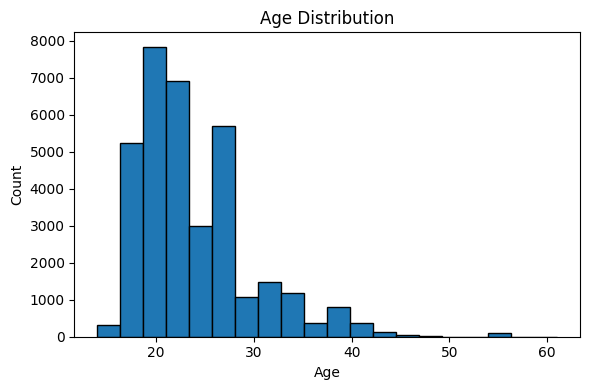

In [24]:
plt.figure(figsize=(6,4))
plt.hist(df['Age'], bins=20, edgecolor='k')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [25]:
quantiles = df['Age'].quantile([0, 0.25, 0.5, 0.75, 1.0])
print(quantiles)

0.00    14.000000
0.25    20.000000
0.50    22.851747
0.75    26.000000
1.00    61.000000
Name: Age, dtype: float64


In [26]:
df['Age_quartile'] = pd.qcut(
    df['Age'],
    q=4,
    labels=['<=20', '21-22', '23-26', '27+']
)

# 2) One‑hot encode those labels
df = pd.get_dummies(df, columns=['Age_quartile'], prefix='AgeQ')

# 3) Verify bucket sizes
print(df.filter(like='AgeQ_').sum())

AgeQ_<=20      9442
AgeQ_21-22     7857
AgeQ_23-26    10557
AgeQ_27+       6742
dtype: int64


In [27]:
# Water intake per kg
df['CH2O_per_kg'] = df['CH2O'] / df['Weight']

In [28]:
# Capture the balance (or imbalance) between high‑calorie consumption (FAVC) and exercise frequency (FAF).
df['act_caloric'] = df['FAVC'] * (1 / (df['FAF'] + 1e-3))


In [29]:
# High screen time coupled with low physical activity is a known risk factor. tech_to_activity computes Technology vs activity ratio 
df['tech_to_activity'] = df['TUE'] / (df['FAF'] + 1e-3)


In [30]:
#split the dataset into train and test sets

train = df[df['NObeyesdad'].notnull()]
test = df[df['NObeyesdad'].isnull()]
test = test.drop(columns=['NObeyesdad'])

test.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking', 'BMI', 'BMI_cat_Underweight', 'BMI_cat_Normal',
       'BMI_cat_Overweight', 'BMI_cat_Obese', 'AgeQ_<=20', 'AgeQ_21-22',
       'AgeQ_23-26', 'AgeQ_27+', 'CH2O_per_kg', 'act_caloric',
       'tech_to_activity'],
      dtype='object')

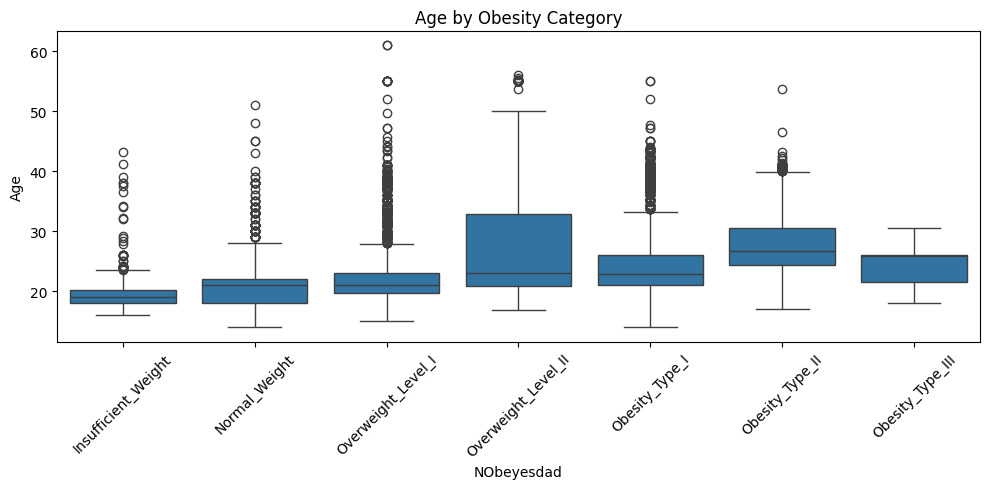

In [32]:
# Define the natural order of obesity classes
order = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

plt.figure(figsize=(10,5))
sns.boxplot(
    x='NObeyesdad',
    y='Age',
    data=train,
    order=order,
    showfliers=True  # this is the default, shows the dots
)
plt.xticks(rotation=45)
plt.title('Age by Obesity Category')
plt.tight_layout()
plt.show()

Key takeaways:
 * Underweight/Normal are concentrated among late teens/early 20s.
 * Higher obesity levels (II & III) have a much broader age range, drawing from both younger and older adults.
 * Especially for Obesity II, age alone is a weaker predictor—you see people from their teens all the way into their 60s.

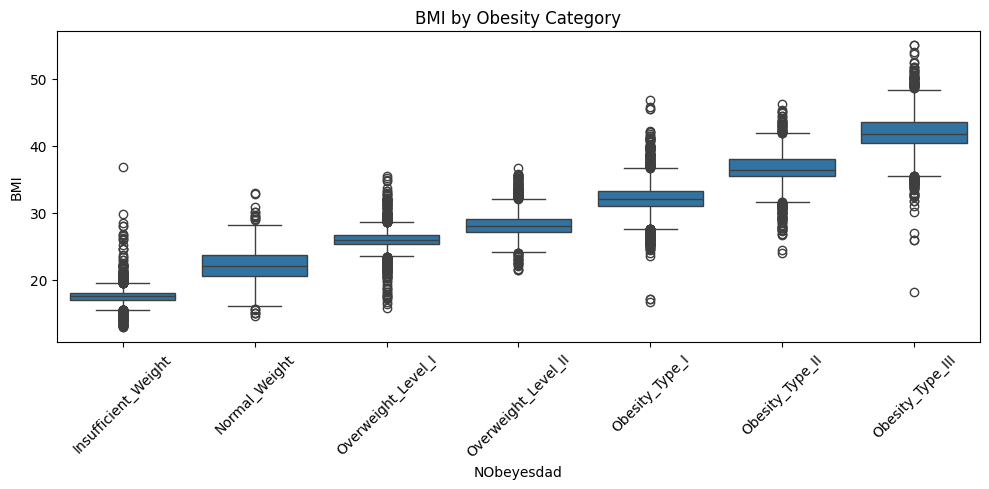

In [36]:
# BMI by Category

plt.figure(figsize=(10,5))
sns.boxplot(
    x='NObeyesdad', y='BMI',
    data=train,
    order=order   # same order list you used before
)
plt.xticks(rotation=45)
plt.title('BMI by Obesity Category')
plt.tight_layout()
plt.show()

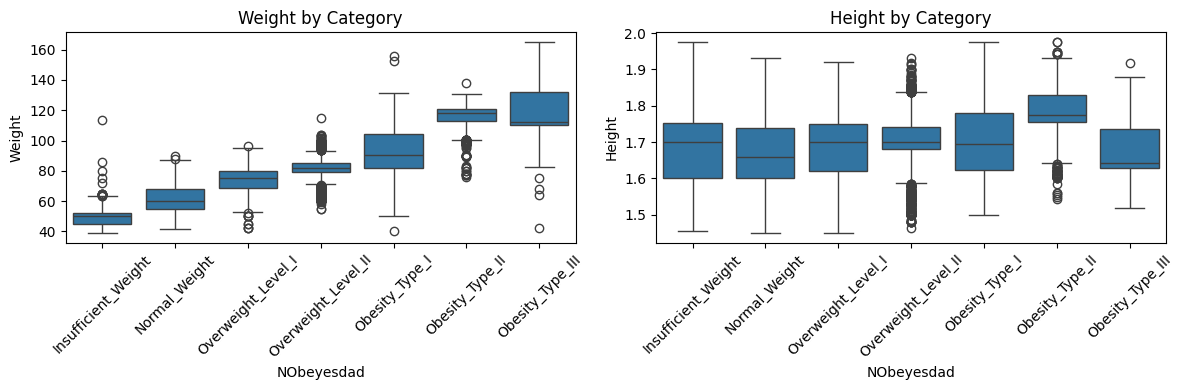

In [ ]:
# Weight and Height
fig, axes = plt.subplots(1, 2, figsize=(12,4), sharey=False)

sns.boxplot(x='NObeyesdad', y='Weight', data=train,
            order=order, ax=axes[0])
axes[0].set_title('Weight by Category')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(x='NObeyesdad', y='Height', data=train,
            order=order, ax=axes[1])
axes[1].set_title('Height by Category')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


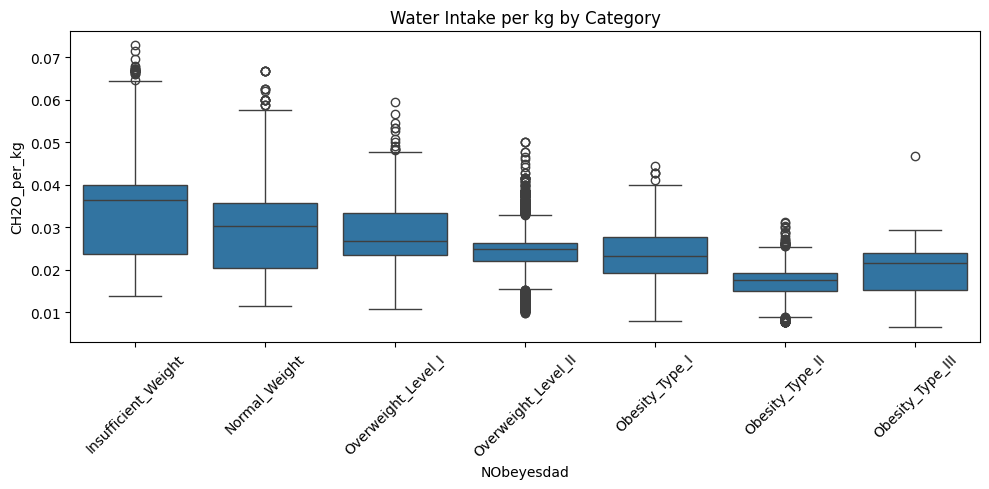

In [39]:
# Water intake per kg
plt.figure(figsize=(10,5))
sns.boxplot(x='NObeyesdad', y='CH2O_per_kg', data=train,
            order=order)
plt.xticks(rotation=45)
plt.title('Water Intake per kg by Category')
plt.tight_layout()
plt.show()


In [41]:
bmi_description = train.groupby('NObeyesdad')['BMI'].describe()
print(bmi_description)

                      count       mean       std        min        25%  \
NObeyesdad                                                               
Insufficient_Weight  2523.0  17.583619  1.388408  12.868541  17.025801   
Normal_Weight        3082.0  22.000999  2.194097  14.631670  20.568937   
Obesity_Type_I       2910.0  32.154649  2.513458  16.597443  31.020408   
Obesity_Type_II      3248.0  36.521958  2.112538  24.048460  35.436970   
Obesity_Type_III     4046.0  41.781745  2.670789  18.178670  40.371119   
Overweight_Level_I   2427.0  26.059270  1.768697  15.761880  25.390625   
Overweight_Level_II  2522.0  28.192491  1.835666  21.513859  27.080170   

                           50%        75%        max  
NObeyesdad                                            
Insufficient_Weight  17.506390  18.025957  36.778115  
Normal_Weight        22.038567  23.661439  32.882414  
Obesity_Type_I       32.121386  33.298647  46.805188  
Obesity_Type_II      36.378753  38.023475  46.222483  
Obe